In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps

from scipy.signal import find_peaks
from scipy import signal

import tifffile as tf

In [2]:
data_src = r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.36.28 vid bloodless 80fps\Allied Vision Technologies GS650 0001f61c\*tif"
ref_src = r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.36.28 vid bloodless 80fps\ref-frames-2024-04-26-17.29.51\150456.tif"
ref_period = 73.106274
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
oog.sequence_manager.set_reference_sequence(ref_src)
oog.sequence_manager.reference_period = ref_period
oog.settings["pi_space"] = False
oog.run()

Setting source to E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.36.28 vid bloodless 80fps\Allied Vision Technologies GS650 0001f61c\*tif
Loading reference sequence from E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.36.28 vid bloodless 80fps\ref-frames-2024-04-26-17.29.51\150456.tif
Getting SADs
Getting phases


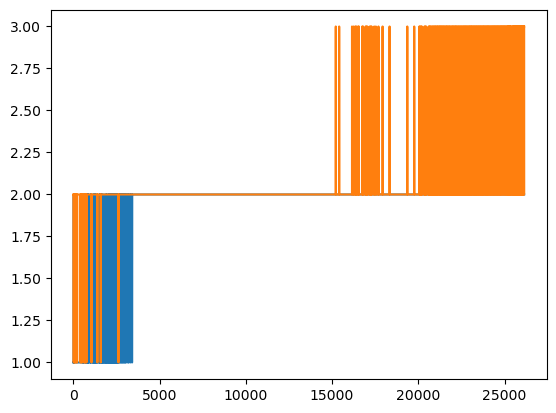

In [3]:
plt.plot(oog.drifts)

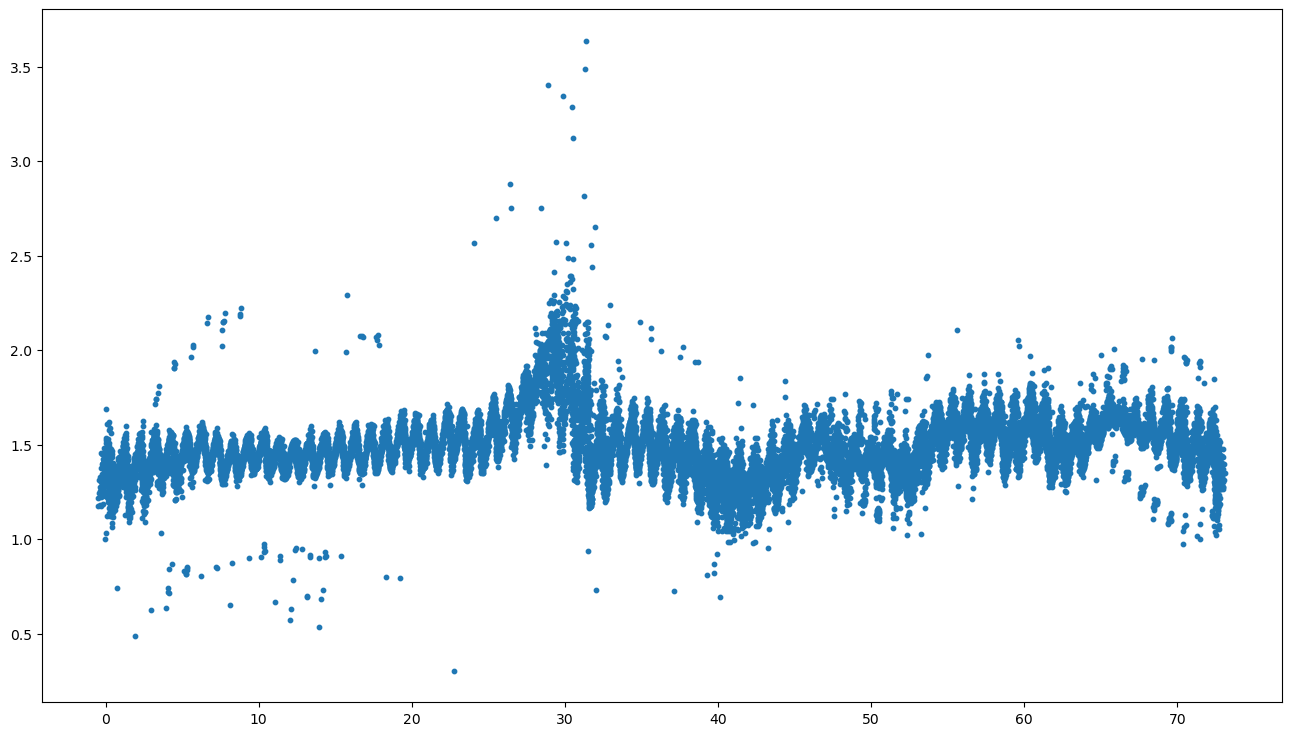

In [4]:
plt.figure(figsize = (16,9))
plt.scatter(oog.phases[1::], oog.delta_phases, s = 10)
plt.show()

In [5]:
print(len(oog.phases))

26132


In [6]:
print(np.where(oog.delta_phases > 6))

(array([], dtype=int64),)


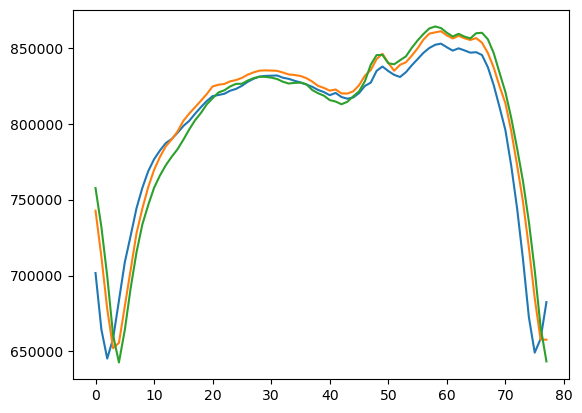

In [7]:
plt.plot(oog.sads[2195])
plt.plot(oog.sads[2196])
plt.plot(oog.sads[2197])

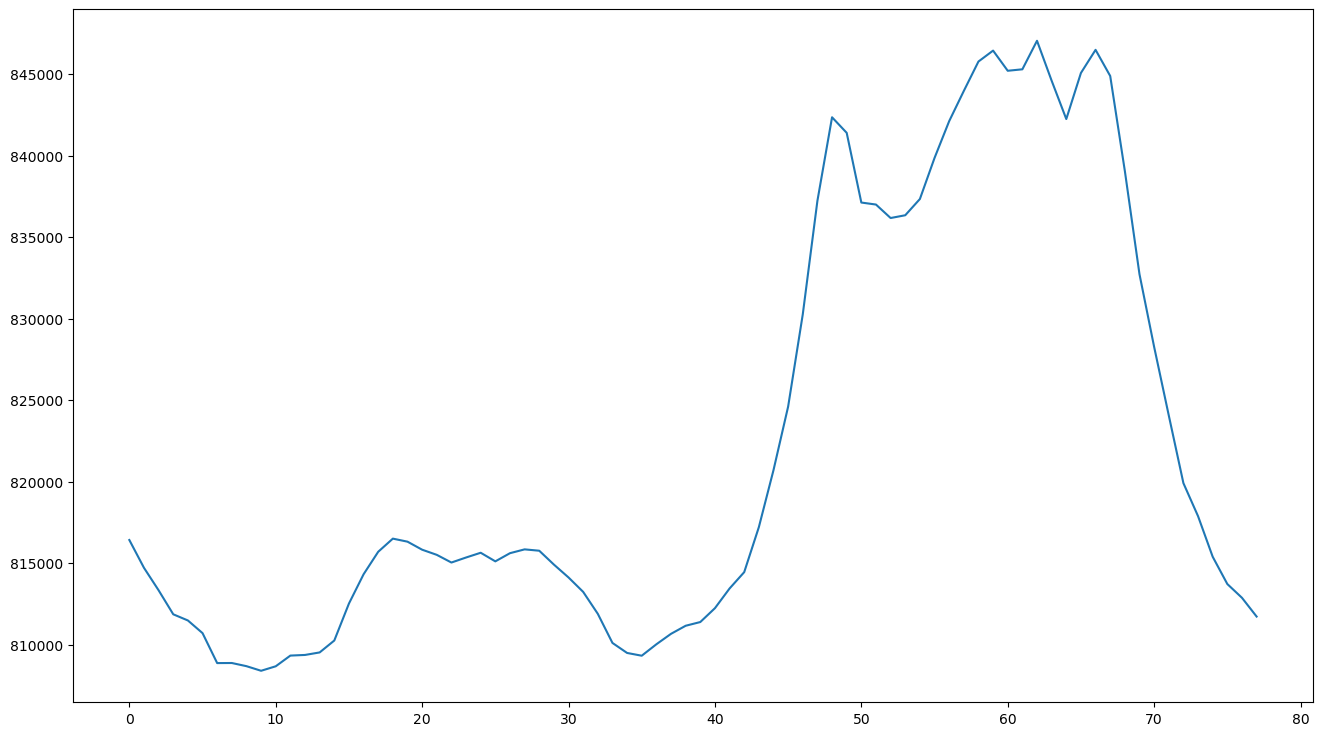

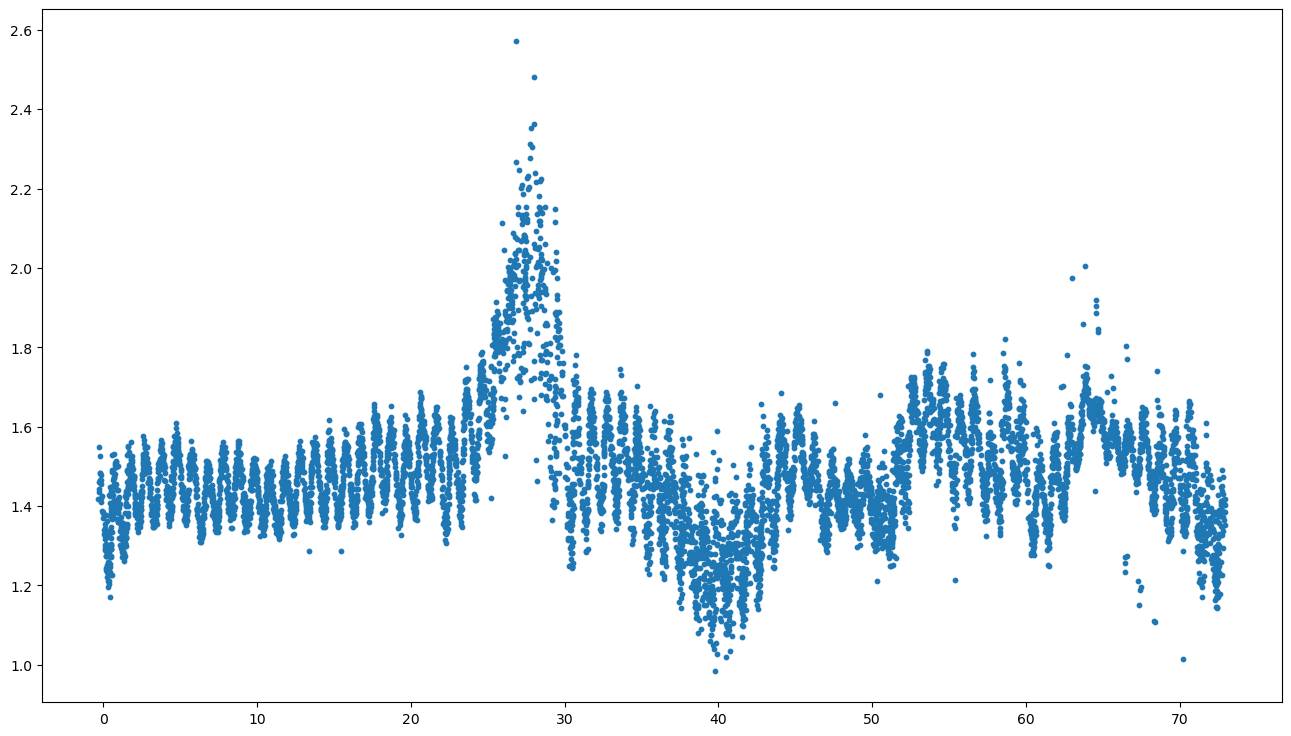

In [8]:
plt.figure(figsize = (16,9))
plt.plot(np.mean(oog.sads, axis = 0))
plt.show()

plt.figure(figsize = (16,9))
plt.scatter(oog.phases[9000:-9001], oog.delta_phases[9000:-9000], s = 10)
plt.show()

In [32]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pgf import FigureCanvasPgf

matplotlib.use('pgf')
matplotlib.backend_bases.register_backend("pgf", FigureCanvasPgf)
matplotlib.rcParams.update(
    {
        # Adjust to your LaTex-Engine
        "pgf.texsystem": "xelatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "axes.unicode_minus": False,
    }
)

matplotlib.rcParams['figure.figsize'] = (4.01407, 3.09654)

In [33]:
plt.scatter(oog.phases[0:4000], oog.delta_phases[0:4000], s = 3)
plt.ylim(0.95,2.3)
plt.xlabel("Reference frame number")
plt.ylabel("Frame progression")
plt.tight_layout()
plt.savefig("bloodless.pgf")

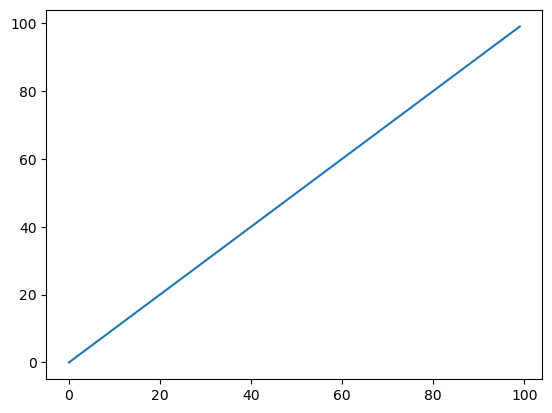

In [10]:
plt.plot(range(0,100), range(0,100))
plt.show()